<!-- ![logo](https://user-images.githubusercontent.com/46791116/153464822-6f966052-ec1e-4835-9d08-ebdc6ed8b287.png)
 -->
<div style="text-align:center">
  <img src="https://user-images.githubusercontent.com/46791116/153464822-6f966052-ec1e-4835-9d08-ebdc6ed8b287.png" />
</div>

<a id ='top'> </a>
# <div style="text-align:center"> Test Technique </div>
    
    
By : [DRIOUCHE Adnane](https://www.linkedin.com/in/adnane-driouche-275763177/)


        
## Sommaire

1. [Statistiques descriptives](#stats)
    1. [Description des données](#df)
    2. [Les variables pertinentes](#var)
    3. [Corrélation entre les variables](#corr)
3. [Machine Learning](#ml) 
    1. [Sans OverSampling](#sans)
    2. [Avec OverSampling](#avec)

In [1]:
# Pour faciliter le pre-processing et avoir
# une vision claire sur ce que je code 
# J'ai créé 2 classes dans le fichier Quantmetry 
# Il contient la classe : PreProcessing et Stats 

from Quantmetry import * 

<a id='stats'></a>

## 1. Statistiques descriptives [🔼](#top)

<a id='df'></a>

### A. Description des données [🔼](#top)

In [2]:
# On définit d'abord notre path de données 
path = 'data.csv'

# La classe PreProcessing accepte comme attribut 
# le chemin d'accès de nos données 
# D'abord, on définit notre objet 
data = PreProcessing(path)

In [3]:
# La méthode get_df(), nous permet de lire les données 
# On affiche par la suite les 2 premiers lignes de 
# nos données 
data.get_df().head(2)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0


In [4]:
# La méthode get_shape() nous permet d'avoir la dimension 
# de notre dataframe 
print(f'Le dimension de notre dataframe est : {data.get_shape()}\n')

# La méhode get_info() nous permet d'avoir une idée sur 
# nos variables ( i.e. type de données, y a t-il des valeurs nul ? )
data.get_info()

Le dimension de notre dataframe est : (20000, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        19909 non-null  object 
 1   cheveux     19897 non-null  object 
 2   age         19909 non-null  float64
 3   exp         19904 non-null  float64
 4   salaire     19905 non-null  float64
 5   sexe        19900 non-null  object 
 6   diplome     19890 non-null  object 
 7   specialite  19907 non-null  object 
 8   note        19886 non-null  float64
 9   dispo       19894 non-null  object 
 10  embauche    20000 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 1.8+ MB


- On a 11 variables 
- On remarque que notre dataframe contiennent des lignes nulles ! 
- Notre dataframe est hétérogène ( i.e. Il contient des variables numériques et catégorielles ) 
- Les variables numériques : age, exp, salaire, note
- Les variables catégorielles : date, cheveux, sexe, diplome, specialite, dispo

<a id='var'></a>

### B. Les variables pertinentes [🔼](#top)

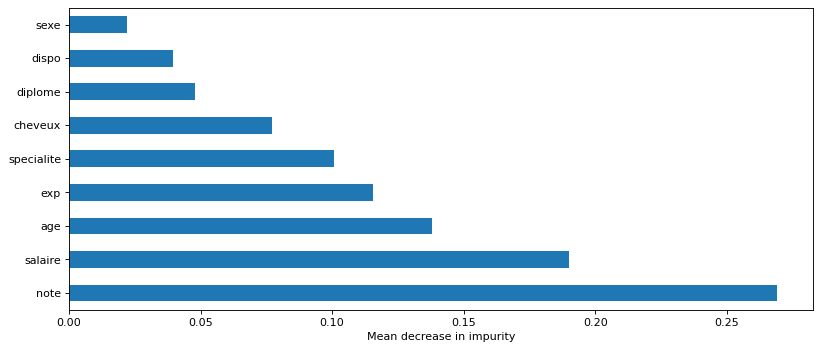

In [5]:
# Avant de commencer le prétraitement, on doit choisir  
# les variables les plus pertinentes. Pour cela, j'ai 
# développé la méthode feature_selection() qui permet 
# de les classer selon leur importance en utilisant 
# ExtraTreesClassifier. Pour les variables catégorielles 
# je les ai appliqué ordinalEncoding avant de faire cette étape

data.feature_selection()

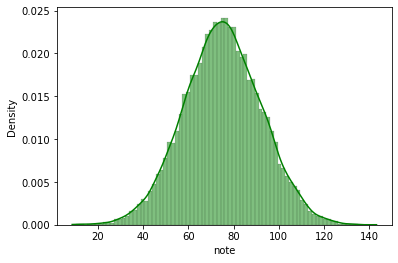

In [6]:
# Avant de passer à la création de notre modèle, on analyse 
# la distribution des variables qu'on a choisis
# Pour cela, j'ai créé la classe Stats qui a comme attribut
# un objet de type PreProcessing 
viz = Stats(data)

# On visualise la distribution de la variable note 
# utilisant la méthode plot_distribution()
viz.plot_distribution('note')

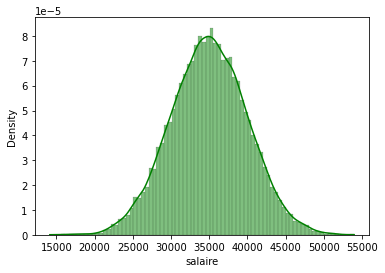

In [7]:
# De même, on visualise le salaire et l'âge 
viz.plot_distribution('salaire')

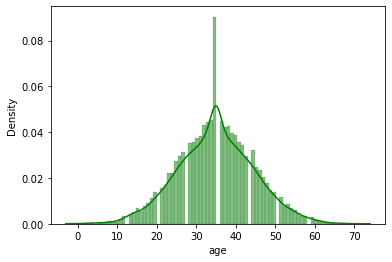

In [8]:
viz.plot_distribution('age')

C:\Users\adnan\.conda\envs\asr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


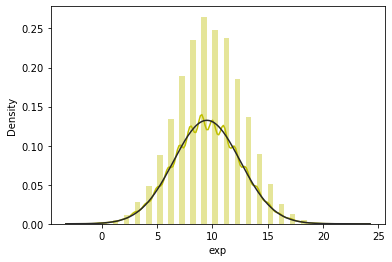

In [9]:
viz.plot_distribution('exp')

- On remarque bien que nos variables suivent une loi normale ! 

<a id='corr'></a>

### C. Corrélation entre les variables  [🔼](#top)

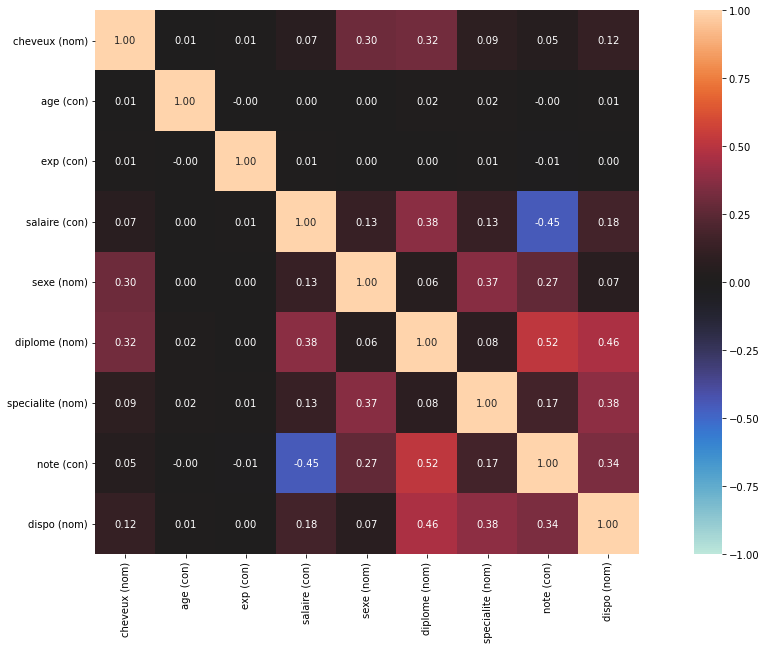

{'corr':                   cheveux (nom)  age (con)  exp (con)  salaire (con)  \
 cheveux (nom)          1.000000   0.006558   0.011077       0.065833   
 age (con)              0.006558   1.000000  -0.001838       0.000120   
 exp (con)              0.011077  -0.001838   1.000000       0.009964   
 salaire (con)          0.065833   0.000120   0.009964       1.000000   
 sexe (nom)             0.298427   0.000293   0.002256       0.129357   
 diplome (nom)          0.320071   0.022884   0.001337       0.382685   
 specialite (nom)       0.090685   0.020155   0.010603       0.129099   
 note (con)             0.052035  -0.004261  -0.010883      -0.447937   
 dispo (nom)            0.123392   0.012164   0.004332       0.179268   
 
                   sexe (nom)  diplome (nom)  specialite (nom)  note (con)  \
 cheveux (nom)       0.298427       0.320071          0.090685    0.052035   
 age (con)           0.000293       0.022884          0.020155   -0.004261   
 exp (con)           0.002

In [10]:
# J'ai développé aussi une méthode qui permet 
# de calculer la corrélation entre toutes les 
# variables ( i.e. numériques et catégorielles)
# Elle est basée sur la bibliothèque dython 

viz.plot_correlation()

In [11]:
# Maintenant, on doit s'assurer de la dépendance significative 
# Pour cela, j'ai développé la méthode calculate_dependency 
# qui retourne correleation entre 2 variables et p-value
# en se basant sur la méthode : Pearson

##################### Specialite VS Sexe ####################
p = viz.calculate_dependency('sexe', 'specialite')
print(f'p-value = {p}')

#####################Cheveux VS Salaire ####################
p = viz.calculate_dependency('cheveux', 'salaire')
print(f'p-value = {p}')

###################### Exp VS Note ####################
corr, p = viz.calculate_dependency('exp', 'note')
print(f'Correlation = {corr} \t p-value = {p}')


p-value = 0.0
p-value = 0.13858190312925042
Correlation = -0.010883153045209367 	 p-value = 0.13337787908834317


- H0_1 : sexe et specialite ne sont pas corrélés. Il s'agit de la H0 utilisée dans le test du chi-deux.
- H0_2 : cheveux et salaire ne sont pas corrélés.
- H0_3 : expérience et note ne sont pas corrélées.

- ==> Dans notre cas, la valeur P est supérieure à 0,05. Par conséquent, H0_2 et H0_3 seront acceptées. Ce qui signifie que les variables ne sont pas corrélées entre elles.

- ==> Or, pour H0_1, , notre P est null ==> càd il y a plus de preuves en faveur de l'hypothèse alternative. Ce qui signifie que les variables sont corrélées entre elles.


<a id='ml'></a>

## 2. Machine Learning [🔼](#top)

<a id='sans'></a>

### A. Sans OverSampling [🔼](#top)

In [12]:
# Par la suite, et d'après l'étape du selection des variables 
# J'ai développé la méthode get_preProcessed_data()
# qui prend comme input 
# 2 lists : 
###### liste des noms des variables catégorielles
###### liste des noms des variables numériques 
# que nous allons pas prendre en compte par la suite 
# du prétraitement 

# Par exemple, dans ce cas, J'ai décidé de prendre 
# les 5 premiers variables : note, salaire, age, exp et specialite

# Je rejette de l'autre côté les variables suivantes 
not_take_cat = ['sexe', 'dispo', 'diplome', 'cheveux']

# J'ai gardé toutes les variables numériques, c'est pour cela
# not_take_num est vide :) 
not_take_num = []

# La méthode nous permet de faire prétraitement ( i.e. traitement
# des données manquantes pour les 2 variables, appliquer oneHotEncoder ...)
# Vous trouvez plus de détails sur la classe dans le fichier 
# Quantmetry.py

X, y = data.get_preProcessed_data(not_take_num, not_take_cat)

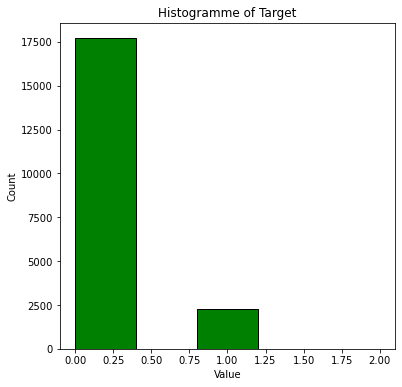

In [13]:
# Maintenant, il faut étudier la distribution 
# de notre target pour voir est ce on a des
# données équilibrées ou pas. Pour cela, j'ai codé 
# la fonction plot_target_hist()

viz.plot_target_hist()

- On remarque bien que nos données sont déséquilibrées ==> ça va influencer négativement l'apprentissage du modèle qu'on va choisir 
- Accuracy ne va pas être le bon choix dans ce cas ==> ça n'a aucune signification 

- <font color ='red'> Pour preuver ce que j'ai écrit. On commence dans un premier temps l'apprentissage de notre modèle avec ces données sans rien changer ! </font>

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score

In [15]:
# On split notre jeu de données en train et test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy : 88.33%
Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      5310
           1       0.42      0.04      0.07       690

    accuracy                           0.88      6000
   macro avg       0.65      0.52      0.50      6000
weighted avg       0.83      0.88      0.84      6000



<AxesSubplot:>

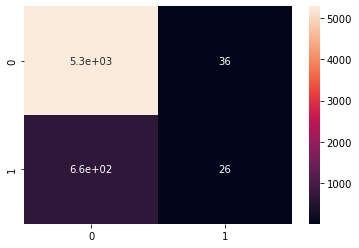

In [16]:
# Pour le choix de modèle, je préfère dans ce cas 
# d'utiliser RF. Elle marche parfaitement dans ce genre 
# de classification. Mais ça n'empêche pas qu'on utlise
# SVM, DT et GNB sauf que ce dernier prend en considération 
# que les variables sont indépendantes 

# On définit notre modèle
model = RandomForestClassifier(n_estimators=50, random_state=1)

# On l'entraîne 
model.fit(X_train, y_train)

# On prédit 
prediction_w = model.predict(X_test)

# Résultats utilisant 4 metrics : acc, precision, recall et f1 score
print(f'Accuracy : {round(accuracy_score(y_test, prediction_w)*100, 2)}%')
print(f'Classification report : \n {classification_report(y_test, prediction_w)}')
sns.heatmap(confusion_matrix(y_test, prediction_w), annot=True)

- Comme j'ai dit, accuracy n'est pas pertinente dans ce cas ==> pour la classe 1, on remarque que recall n'a même pas dépassé 7% 
- Pour éviter ça, je vais adopter une méthode connue par : OverSampling. En fait, Il y' en a une autre : Undersampling 

<a id='avec'></a>

### B. Avec OverSampling [🔼](#top)

In [17]:
# Je l'ai codé utilisant la fonction resample 
# de sklearn.utils 

data.upSampling_df()

In [18]:
# On vérifie la taille de nos données 
# ils vont être changer bien sûr :) 
print(f'La taille de notre dataframe est : {data.get_df().shape}')

La taille de notre dataframe est : (35416, 11)


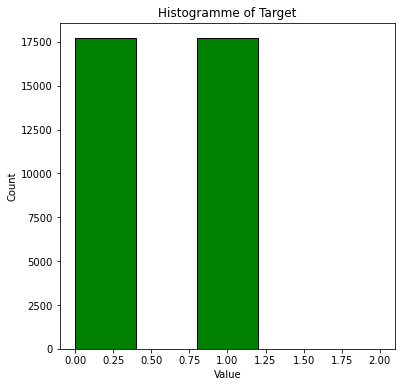

In [19]:
# On vérifie si Upsamling est bien appliqué en 
# plottant hitogram de notre target 
viz.plot_target_hist()

In [20]:
# On commence le pré traitement en gardant les mêmes variables 
X, y = data.get_preProcessed_data(not_take_num, not_take_cat)

In [21]:
# On split notre jeu de données en train et test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy : 97.1%
Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      5324
           1       0.95      0.99      0.97      5301

    accuracy                           0.97     10625
   macro avg       0.97      0.97      0.97     10625
weighted avg       0.97      0.97      0.97     10625



<AxesSubplot:>

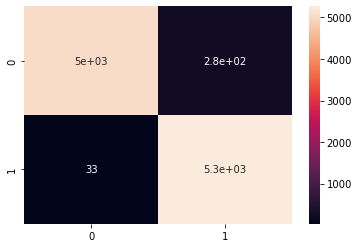

In [22]:
# On définit notre modèle
model = RandomForestClassifier(n_estimators=50, random_state=1)

# On l'entraîne 
model.fit(X_train, y_train)

# On prédit 
prediction_w = model.predict(X_test)

# Résultats utilisant 4 metrics : acc, precision, recall et f1 score
print(f'Accuracy : {round(accuracy_score(y_test, prediction_w)*100, 2)}%')
print(f'Classification report : \n {classification_report(y_test, prediction_w)}')
sns.heatmap(confusion_matrix(y_test, prediction_w), annot=True)

- On a bien des bons résultats :) 